In [33]:
import pickle
import os
import imp
import seaborn as sns
building_tools = imp.load_source('building_tools', '../../building_tools/building_tools.py')

# Get Results from Pickle

In [88]:
# Load results
'''
with open('results/full_results.pickle', 'rb') as file:
    results = pickle.load(file)
'''
# If you want to load each result dictionary sequentially...
results = {}
for file in os.listdir('results'):
    f_name, f_ext = os.path.splitext(file)
    if f_ext == '.pickle' and f_name != 'full_results':
        with open(os.path.join('results', file), 'rb') as temp_file:
            results[f_name] = pickle.load(temp_file)

In [89]:
# List of keys
clf_list = list(results.keys())
# Mapping of keys to "pretty" names
model_names = {'tree': 'Decision Tree', 
               'gnb': 'Naive Bayes', 
               'knn': 'K-Nearest Neighbor', 
               'log': 'Logistic Regression', 
               'rfc': 'Random Forest', 
               'etc': 'Extra Trees', 
               'adt': 'Adaboost',
               'gbc': 'Gradient Boosting Classifier',
               'mlp': 'Multi-layer Perceptron',}
# List of hex-value colors based on Seaborn's husl color palette
clf_colors = sns.color_palette("husl", len(clf_list)).as_hex()
# List of "pretty names"
clf_names = [model_names[clf] for clf in clf_list]

# Best Params for Each Model

In [90]:
for clf in results.keys():
    print(model_names[clf], '\n', results[clf]['model'], '\n')

Gradient Boosting Classifier 
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=350,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False) 

K-Nearest Neighbor 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
           weights='uniform') 

Decision Tree 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=

# Review Log Loss Scores for Each Model

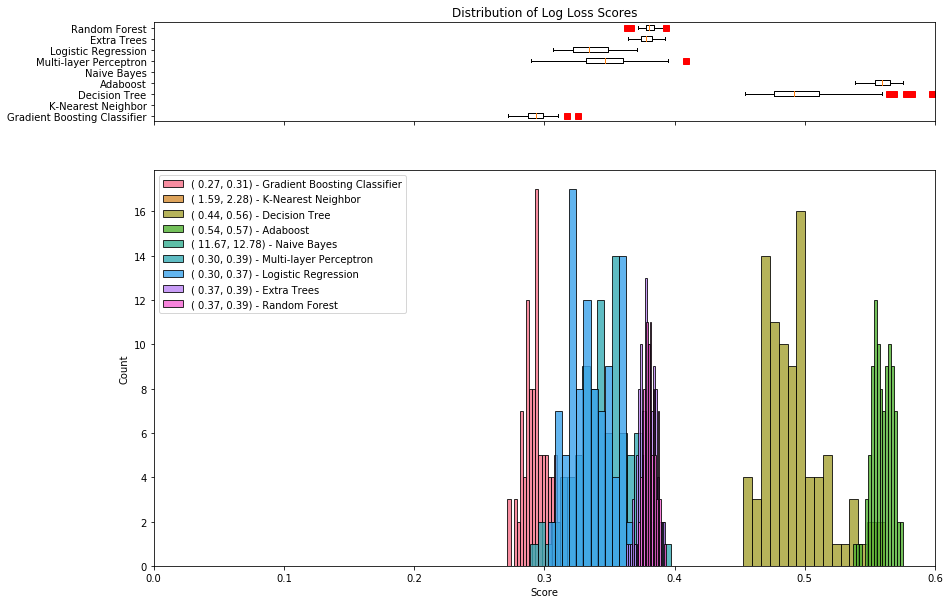

In [91]:
scores = [results[clf]['cv_scores']['test_log_loss'] for clf in clf_list]
building_tools.plot_distributions(*scores, labels=names, scorer='Log Loss', colors=clf_colors, num_bins=20, x_lim=[0.0, 0.6], alpha=0.8, plot_height=10, limit_outliers=True)

In [92]:
building_tools.comparison(*scores, labels=names, scorer='Log Loss')

Comparison of Log Loss Scores
  Gradient Boosting Classifier  Mean: 0.29  Std: 0.01  95%Conf: (0.27, 0.31)
  K-Nearest Neighbor            Mean: 1.94  Std: 0.18  95%Conf: (1.59, 2.28)
  Decision Tree                 Mean: 0.50  Std: 0.03  95%Conf: (0.44, 0.56)
  Adaboost                      Mean: 0.56  Std: 0.01  95%Conf: (0.54, 0.57)
  Naive Bayes                   Mean: 12.23  Std: 0.28  95%Conf: (11.67, 12.78)
  Multi-layer Perceptron        Mean: 0.35  Std: 0.02  95%Conf: (0.30, 0.39)
  Logistic Regression           Mean: 0.34  Std: 0.02  95%Conf: (0.30, 0.37)
  Extra Trees                   Mean: 0.38  Std: 0.01  95%Conf: (0.37, 0.39)
  Random Forest                 Mean: 0.38  Std: 0.01  95%Conf: (0.37, 0.39)


# Review Accuracy Scores for Each Model

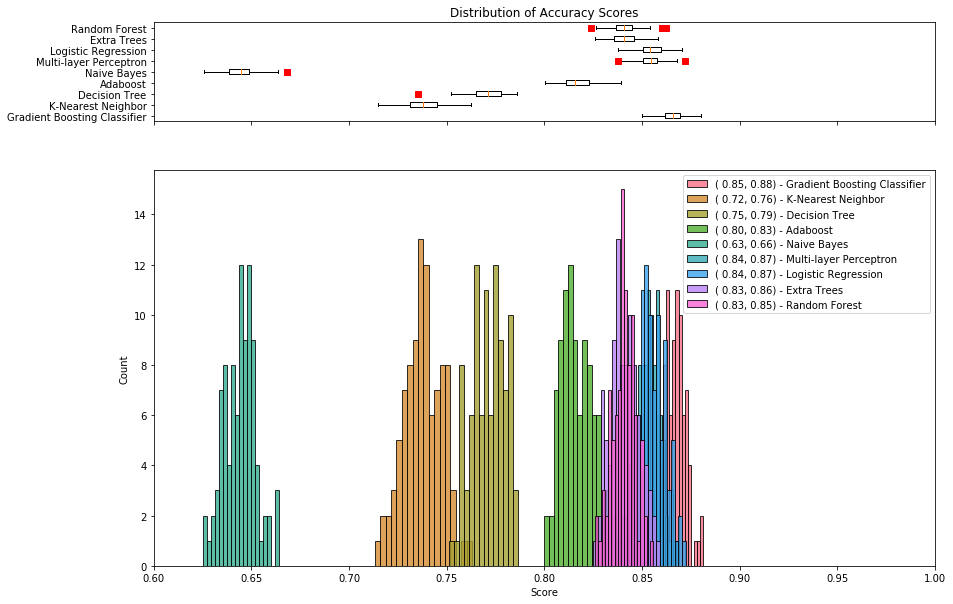

In [93]:
scores = [results[clf]['cv_scores']['test_accuracy'] for clf in clf_list]
building_tools.plot_distributions(*scores, labels=names, scorer='Accuracy', colors=clf_colors, num_bins=20, x_lim=[0.6, 1.0], alpha=0.8, plot_height=10, limit_outliers=True)

In [94]:
building_tools.comparison(*scores, labels=names, scorer='Accuracy')

Comparison of Accuracy Scores
  Gradient Boosting Classifier  Mean: 0.87  Std: 0.01  95%Conf: (0.85, 0.88)
  K-Nearest Neighbor            Mean: 0.74  Std: 0.01  95%Conf: (0.72, 0.76)
  Decision Tree                 Mean: 0.77  Std: 0.01  95%Conf: (0.75, 0.79)
  Adaboost                      Mean: 0.82  Std: 0.01  95%Conf: (0.80, 0.83)
  Naive Bayes                   Mean: 0.64  Std: 0.01  95%Conf: (0.63, 0.66)
  Multi-layer Perceptron        Mean: 0.85  Std: 0.01  95%Conf: (0.84, 0.87)
  Logistic Regression           Mean: 0.85  Std: 0.01  95%Conf: (0.84, 0.87)
  Extra Trees                   Mean: 0.84  Std: 0.01  95%Conf: (0.83, 0.86)
  Random Forest                 Mean: 0.84  Std: 0.01  95%Conf: (0.83, 0.85)


# Review Weighted F1 Scores for Each Model

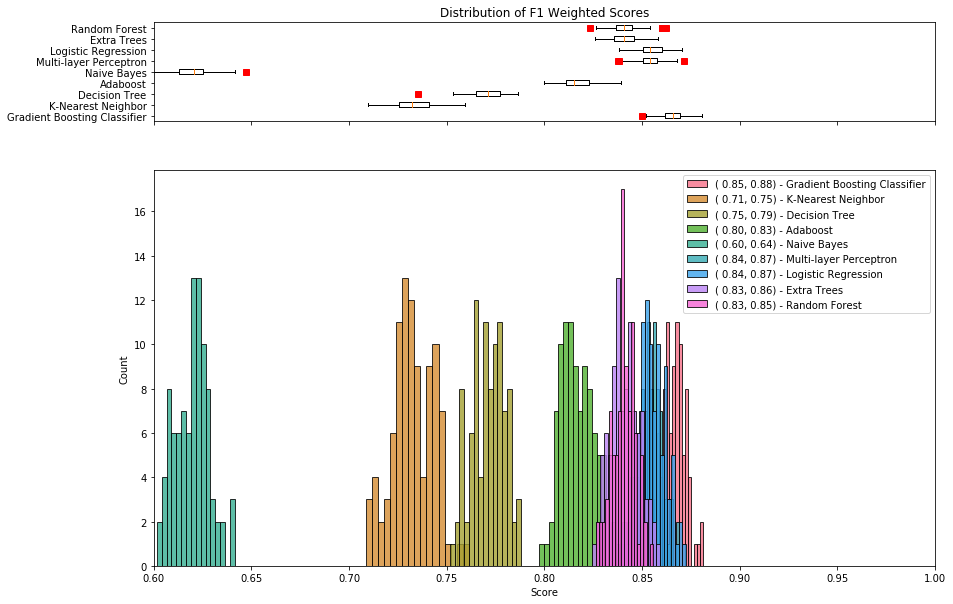

In [95]:
scores = [results[clf]['cv_scores']['test_f1_weighted'] for clf in clf_list]
building_tools.plot_distributions(*scores, labels=names, scorer='F1 Weighted', colors=clf_colors, num_bins=20, x_lim=[0.6, 1.0], alpha=0.8, plot_height=10, limit_outliers=True)

In [96]:
building_tools.comparison(*scores, labels=names, scorer='F1 Weighted')

Comparison of F1 Weighted Scores
  Gradient Boosting Classifier  Mean: 0.87  Std: 0.01  95%Conf: (0.85, 0.88)
  K-Nearest Neighbor            Mean: 0.73  Std: 0.01  95%Conf: (0.71, 0.75)
  Decision Tree                 Mean: 0.77  Std: 0.01  95%Conf: (0.75, 0.79)
  Adaboost                      Mean: 0.82  Std: 0.01  95%Conf: (0.80, 0.83)
  Naive Bayes                   Mean: 0.62  Std: 0.01  95%Conf: (0.60, 0.64)
  Multi-layer Perceptron        Mean: 0.85  Std: 0.01  95%Conf: (0.84, 0.87)
  Logistic Regression           Mean: 0.86  Std: 0.01  95%Conf: (0.84, 0.87)
  Extra Trees                   Mean: 0.84  Std: 0.01  95%Conf: (0.83, 0.86)
  Random Forest                 Mean: 0.84  Std: 0.01  95%Conf: (0.83, 0.85)


# Learn Stacked Ensemble Weights with Stochastic Gradient Descent

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, log_loss, accuracy_score, f1_score

In [97]:
# Load Data
with open('../transform_indiv_on_correlation/agg_df.pickle', 'rb') as file:
    df = pickle.load(file)

X = df.drop(labels=['poor'], axis=1)
Y = df['poor']

# Reserve 30% of Data for a Holdout Validation Set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=541030, stratify=Y)

In [192]:
from sklearn.base import BaseEstimator

In [222]:
class stacked_ensemble_with_learned_weights(BaseEstimator):
    # Import statements
    from sklearn.ensemble import VotingClassifier
    from sklearn.linear_model import SGDClassifier
    
    def __init__ (self, clfs, loss='log', penalty='l2', tol=1e-3, n_jobs=-1):
        self.clfs = clfs
        self.loss = loss
        self.penalty = penalty
        self.tol = tol
        self.n_jobs = n_jobs
        
    def fit (self, X, Y):
        self.X = X
        self.Y = Y
        # Initialize and fit the VotingClassifier
        stacked = VotingClassifier(estimators=self.clfs, voting='soft', flatten_transform=False, n_jobs=self.n_jobs)
        stacked = stacked.fit(self.X, self.Y)
        # For each row, return an array of probabilities assigned by each model
        prob_array = stacked.transform(self.X)
        # Keep only class 1 and transpose for correct shape
        self.prob_array = prob_array[:,:,1].T
        # Initialize and fit the Stochastic Gradient Descent Classifier
        sgd = SGDClassifier(loss=self.loss, penalty=self.penalty, tol=self.tol, shuffle=True, n_jobs=-1)
        sgd.fit(self.prob_array, self.Y)
        # Gather the coefficients (these will be weights for Voting Classifier)
        self.weights = sgd.coef_[0]
        # Initialize and fit a new VotingClassifier that now includes the weights
        stacked = VotingClassifier(estimators=self.clfs, voting='soft', weights=self.weights, flatten_transform=False, n_jobs=self.n_jobs)
        self.stacked = stacked.fit(self.X, self.Y)
        return self.stacked
        
    def predict (self, X):
        return self.stacked.predict(X)
    
    def predict_proba (self, X):
        return self.stacked.predict_proba(X)

In [238]:
# List of tuples of model name and fit model
#models = [(clf, results[clf]['model']) for clf in clf_list]
models = [('log', results['log']['model']), ('gnb', results['gnb']['model']), ('tree', results['tree']['model'])]

In [239]:
models

[('log', LogisticRegression(C=1, class_weight='balanced', dual=False,
            fit_intercept=True, intercept_scaling=1, max_iter=100,
            multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
            solver='liblinear', tol=0.1, verbose=0, warm_start=False)),
 ('gnb', GaussianNB(priors=None)),
 ('tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best'))]

In [240]:
# Initialize and fit stacked ensemble
stack = stacked_ensemble_with_learned_weights(models)
stack.fit(x_train, y_train)

/Users/Zander/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
/Users/Zander/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


VotingClassifier(estimators=[('log', LogisticRegression(C=1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.1, verbose=0, warm_start=False)), ('gnb', Gau...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=False, n_jobs=-1, voting='soft',
         weights=array([ 6.47606,  1.08352,  1.20804]))

In [241]:
# Show models and relative weights
print([x[0] for x in stack.clfs])
print(stack.weights)

['log', 'gnb', 'tree']
[ 6.47605531  1.08352174  1.20804237]


In [242]:
# Make predictions
y_pred = stack.predict(x_test)
y_pred_proba = stack.predict_proba(x_test)

In [243]:
# Print Results of stacked ensemble
print('Log Loss:', log_loss(y_test, y_pred_proba))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 Weighted Score:', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Log Loss: 0.32613939881
Accuracy: 0.863063795205
F1 Weighted Score: 0.855921333903
[[1123  227]
 [ 110 1001]]
             precision    recall  f1-score   support

      False       0.91      0.83      0.87      1350
       True       0.82      0.90      0.86      1111

avg / total       0.87      0.86      0.86      2461



The log loss score has gone down! Logistic Regression had the best of these three at 0.34, and now we're at 0.32.

In [244]:
scores = [results[clf[0]]['cv_scores']['test_log_loss'] for clf in stack.clfs]
building_tools.comparison(*scores, labels=names, scorer='Log Loss')

Comparison of Log Loss Scores
  Gradient Boosting Classifier  Mean: 0.34  Std: 0.02  95%Conf: (0.30, 0.37)
  K-Nearest Neighbor            Mean: 12.23  Std: 0.28  95%Conf: (11.67, 12.78)
  Decision Tree                 Mean: 0.50  Std: 0.03  95%Conf: (0.44, 0.56)
